### Shape of the utility function evaluated on capital grid [5, 20] on 1000 points

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from src.dp import UtilityFactory, value_iteration

alpha = 0.4
sigma = 1
delta = 0.04

utility = UtilityFactory.utility3(alpha=alpha, delta=delta)
capital = np.linspace(5, 20, num=1000)

c:\Users\Korisnik\Desktop\git\macro\src\dp.py:14: RuntimeWarning: invalid value encountered in log
  return np.log(ct)


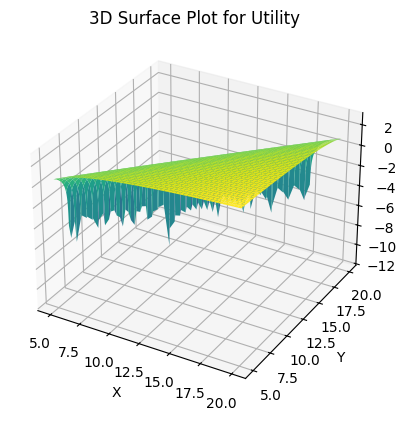

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D plotting

X, Y = np.meshgrid(capital, capital)
# Define the function z = f(x, y)
Z = utility(X, Y)

# Set up the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Plot the surface
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_title('3D Surface Plot for Utility')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Utility')
plt.show()


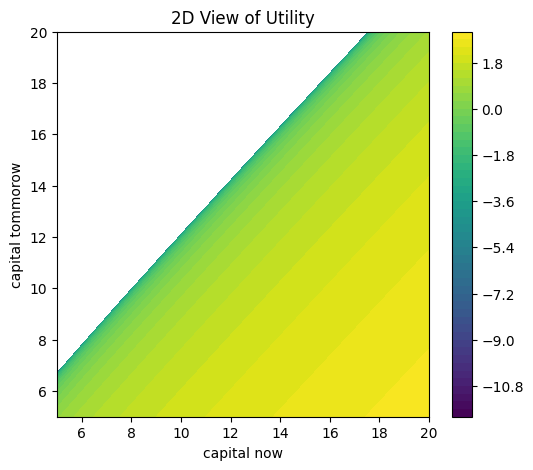

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create the grid
X, Y = np.meshgrid(capital, capital)
Z = utility(X, Y)

# Plot the 2D filled contour
plt.figure(figsize=(6, 5))
contour = plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(contour)
plt.title("2D View of Utility")
plt.xlabel("capital now")
plt.ylabel("capital tommorow")
plt.show()


### Algorithm

In [4]:
alpha = 0.4
delta = 0.04
beta = 0.96
#epsilon = 0.0001
epsilon = 0.5

capital = np.linspace(5, 20, num=1000)
u = UtilityFactory.utility3(alpha, delta)
#state_values, state_path = value_iteration(states=capital, utility_function=u, alpha=alpha, beta=beta, capital_deprec=delta, epsilon=epsilon)
#np.save('repo/path.npy', state_path)
#np.save('repo/state_values.npy', state_values)
#state_path = np.load('
# repo/path.npy')
#state_values = np.load('repo/state_values.npy')

In [5]:
state_path = np.load('repo/path.npy')
state_values = np.load('repo/state_values.npy')

# Value of capital

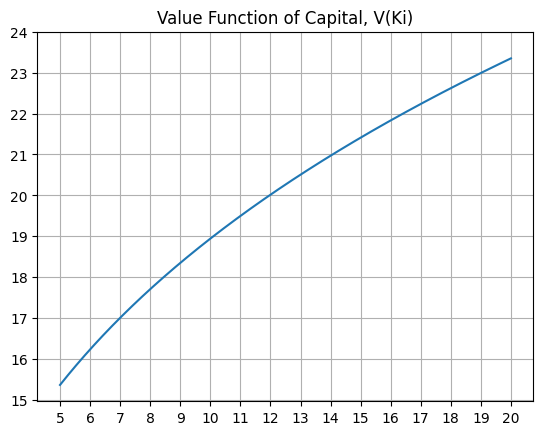

In [6]:
import pandas as pd
ds = {"Capital": [], "Value": []}
for i,v in enumerate(state_values):
    c = capital[i]
    ds['Capital'].append(c)
    ds['Value'].append(v)

df = pd.DataFrame(ds)
T = len(df)
plt.title("Value Function of Capital, V(Ki)")
_=plt.plot(df["Capital"], df["Value"])
_=plt.xticks(np.arange(round(np.min(df["Capital"])), np.max(df["Capital"]+1), step=1))  
_=plt.yticks(np.arange(round(np.min(df["Value"])), np.max(df["Value"]+1), step=1))  
plt.grid()
plt.show()

# Consumption across time

In [7]:
def get_capital_choices(capital_levels: np.array):
    """
        Returns capital trajectories for the initial capital 
    """
    state_path = np.load('repo/path.npy')
    state_path = state_path.astype(int)
    f = np.vectorize(lambda x: capital_levels[x])
    capital_paths = f(state_path)
    return capital_paths

def production(capital, alpha):
    return capital**alpha

def consumption(k_now, k_next, alpha, delta):
    return production(k_now, alpha) + (1-delta)*k_now - k_next

def get_consumption_levels(capital_paths, production_function, delta):
    capital_levels = np.linspace(5, 20, num=1000)
    capital_paths = get_capital_choices(capital_levels)
    N, T = capital_paths.shape
    print(f"levels = {N}, T = {T}")
    path_nums, _ = capital_paths.shape
    ct = np.zeros_like(capital_paths)
    for i in range(path_nums):
        capital_t = capital_paths[i][::-1]
        stored_t  = (1-delta)*capital_t
        capital_next = np.append(capital_t[1:], [0])
        ct[i, :] = capital_t**alpha + stored_t - capital_next
    return ct

def get_future_capital(capital_paths, production_function, delta):
    path_nums, _ = capital_paths.shape
    ct = np.zeros_like(capital_paths)
    for i in range(path_nums):
        capital_t = capital_paths[i, :]
        stored_t  = (1-delta)*capital_t
        capital_next = np.append(capital_paths[i, 1:], [0])
        ct[i, :] = production_function(capital_t) + stored_t - capital_next
    return ct

levels = 1000, T = 218
levels = 1000, T = 218


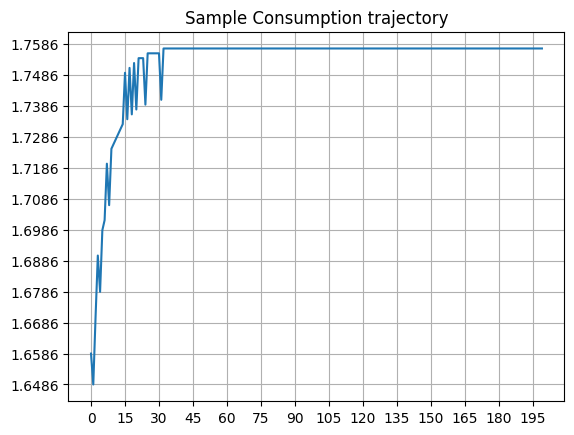

In [8]:
alpha = 0.4
delta = 0.04

capital_levels = np.linspace(5, 20, num=1000)
capital_paths = get_capital_choices(capital_levels)
N, T = capital_paths.shape
print(f"levels = {N}, T = {T}")

production_function = lambda xs : production(xs, alpha)
ct = get_consumption_levels(capital_paths, production_function, delta)


plt.title("Sample Consumption trajectory")
M = 200
ct_sample = ct[0][:M]
plt.plot(ct_sample)
plt.xticks(np.arange(0, M, step=15))
plt.yticks(np.arange(np.min(ct_sample), np.max(ct_sample)+0.01, step=0.01))  
plt.grid()

## Capital Consumption, Kt(Ct)

(1000, 218) (1000, 218) 218


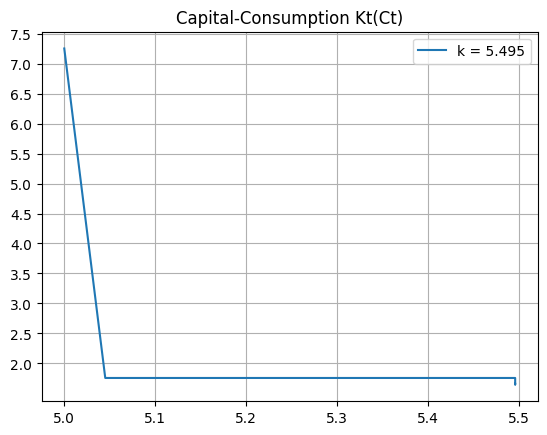

In [18]:
print(capital_paths.shape, ct.shape, len(capital_paths[0,:]))
N, T = capital_paths.shape
plt.title("Capital-Consumption Kt(Ct)")

sample = [0]
for i in sample:
    k0 = round(capital_paths[i,:][0], 3)
    _=plt.plot(capital_paths[i,:], ct[i, :], label=f"k = {k0}")

plt.yticks(np.arange(2, 8, step=0.5))  

plt.grid()
plt.legend()

## Capital vs. Next capital: k(k')

218 218


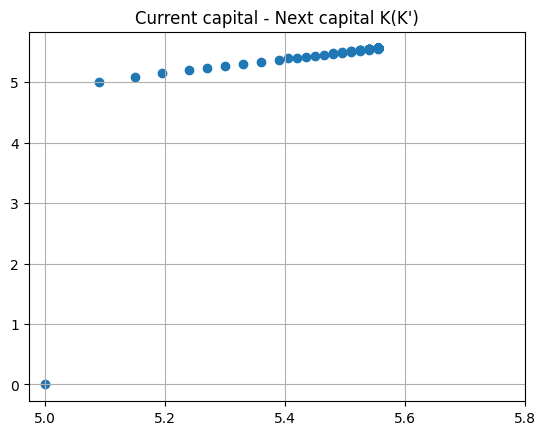

In [23]:
i = 4
capital_t = capital_paths[i, :]
capital_next = np.append(capital_paths[i, 1:], [0])
print(len(capital_t), len(capital_next))

plt.title("Current capital - Next capital K(K')")
plt.scatter(capital_t, capital_next)
_=plt.xticks(np.arange(5, 6, step=0.2))  
_=plt.yticks(np.arange(np.min(capital_next), np.max(capital_next), step=1))  
plt.grid()

## Steady state

Steady state of the system is the state where the observed varaible become constant. In our case we are observing capital and consumption steady states. 
In the dynamic programming, the steady states of the consumption are derived from the optimal temporal capital allocations. 

In the steady state is is valid:

$c_T = c_{T+1} = c_{T+2} = css$

$k_t = k_{t+1} = k_{t+2} = kss$

<br>
From the motion of capital equation we can find our equations for capital steady state:

$c_t = k_t^\alpha - (1-\delta)k_t - k_{t+1}$

$css = k_{ss}^\alpha - (1-\delta)k_{ss} - k_{ss}$

$kss = \frac{c_{ss}}{1-\sigma}$



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from src.dp import UtilityFactory

state_path = np.load('repo/path.npy')
state_values = np.load('repo/state_values.npy')
capital_levels = np.linspace(5, 20, num=1000)
capital_paths = get_capital_choices(capital_levels)
utility = lambda c : np.log(c)

alpha = 0.4
delta = 0.04
beta = 0.96
production_function = lambda xs : production(xs, alpha)
ct = get_consumption_levels(capital_paths, production_function, delta)
css = ct[:, -1]
kss = css / (1-delta)


levels = 1000, T = 218


array([ 7.2526578 ,  7.26923108,  7.28580084,  7.30236708,  7.31892983,
        7.3354891 ,  7.3520449 ,  7.36859725,  7.38514616,  7.40169166,
        7.41823374,  7.43477243,  7.45130775,  7.4678397 ,  7.4843683 ,
        7.50089357,  7.51741551,  7.53393415,  7.55044949,  7.56696155,
        7.58347035,  7.59997589,  7.61647819,  7.63297727,  7.64947313,
        7.64947313,  7.6659658 ,  7.68245528,  7.69894158,  7.71542472,
        7.73190472,  7.74838158,  7.76485532,  7.78132594,  7.79779347,
        7.81425792,  7.83071929,  7.8471776 ,  7.86363287,  7.88008509,
        7.8965343 ,  7.91298049,  7.92942368,  7.94586388,  7.9623011 ,
        7.97873536,  7.99516667,  8.01159503,  8.02802047,  8.04444298,
        8.06086258,  8.06086258,  8.07727929,  8.09369312,  8.11010406,
        8.12651215,  8.14291738,  8.15931977,  8.17571932,  8.19211606,
        8.20850999,  8.22490112,  8.24128946,  8.25767502,  8.27405781,
        8.29043785,  8.30681514,  8.32318969,  8.33956151,  8.35

In [27]:
N, T = ct.shape
ni = css / production_function(kss)
ni = np.tile(ni, (T, 1)).T   # 4 rows, 3 columns
produced = production_function(capital_paths)
ct_ = produced*ni
discounts = np.array([beta**t for t in range(T)])
v0k = (discounts*ct_).sum(axis=1)


In [ ]:
alpha = 0.4
delta = 0.04
beta = 0.96
epsilon = 0.0001
capital = np.linspace(5, 20, num=1000)
u = UtilityFactory.utility3(alpha, delta)

dp = DP()
dp.set_init(v0k)
state_values, state_path = dp.value_iteration(states=capital, utility_function=u, beta=beta, epsilon=epsilon)